# read dataset

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import ks_2samp

In [80]:
AI_Powered_Job_Market = pd.read_csv('ai_job_market_insights.csv')
AI_Powered_Job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [81]:
AI_Job_Threat_Index = pd.read_csv('My_Data.csv')
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


# Data cleaning and exploration

### Dataset 1: AI Powered Job Market

In [82]:
print("\nSummary statistics:")
print(AI_Powered_Job_Market.describe())


Summary statistics:
          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614


In [83]:
AI_Powered_Job_Market["AI_Adoption_Level"] = pd.Categorical(AI_Powered_Job_Market["AI_Adoption_Level"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Automation_Risk"] = pd.Categorical(AI_Powered_Job_Market["Automation_Risk"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Job_Growth_Projection"] = pd.Categorical(AI_Powered_Job_Market["Job_Growth_Projection"], categories=["Decline", "Stable", "Growth"], ordered=True)

##### AI Adoption Levels Across Industries

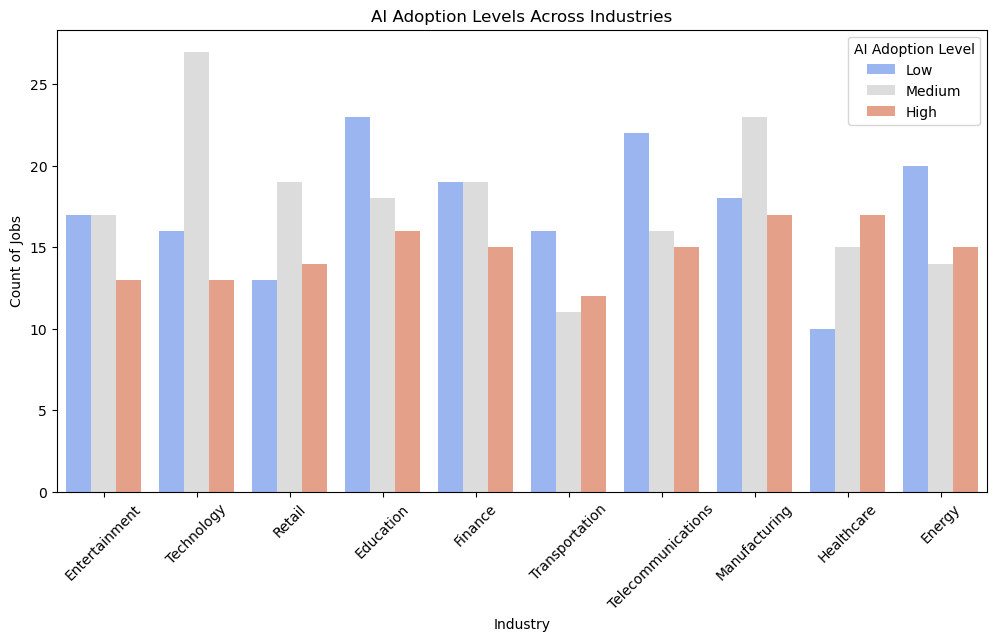

In [84]:
plt.figure(figsize=(12, 6))
sns.countplot(data=AI_Powered_Job_Market, x="Industry", hue="AI_Adoption_Level", palette="coolwarm")
plt.title("AI Adoption Levels Across Industries")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Count of Jobs")
plt.legend(title="AI Adoption Level")
plt.show()

##### Salary Distribution by AI Adoption Level

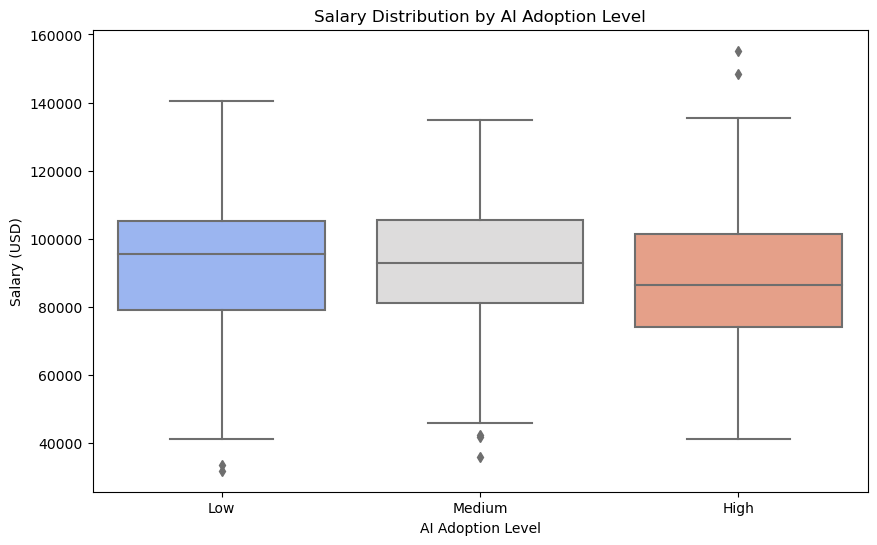

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", y="Salary_USD", palette="coolwarm")
plt.title("Salary Distribution by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Salary (USD)")
plt.show()

##### Salary Comparison by Automation Risk Level

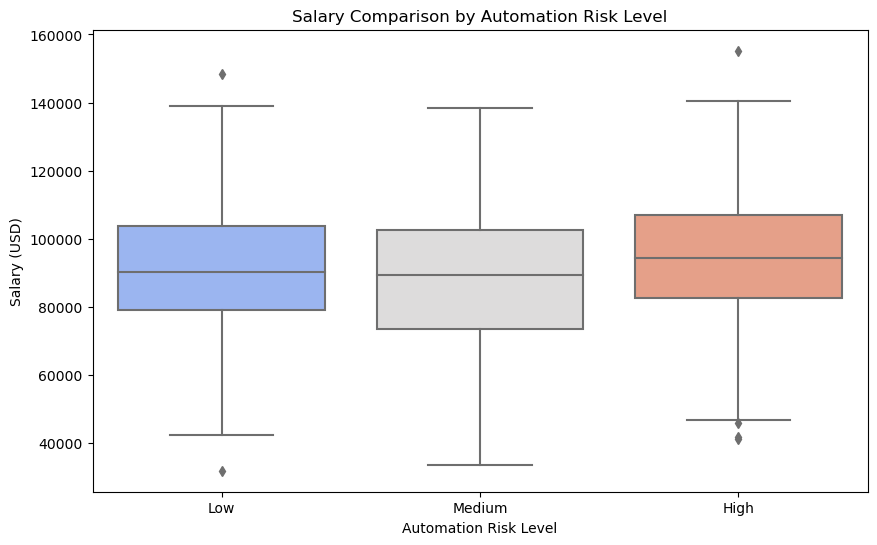

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=AI_Powered_Job_Market, x="Automation_Risk", y="Salary_USD", palette="coolwarm")
plt.title("Salary Comparison by Automation Risk Level")
plt.xlabel("Automation Risk Level")
plt.ylabel("Salary (USD)")
plt.show()

##### Job Growth Projection Across Industries

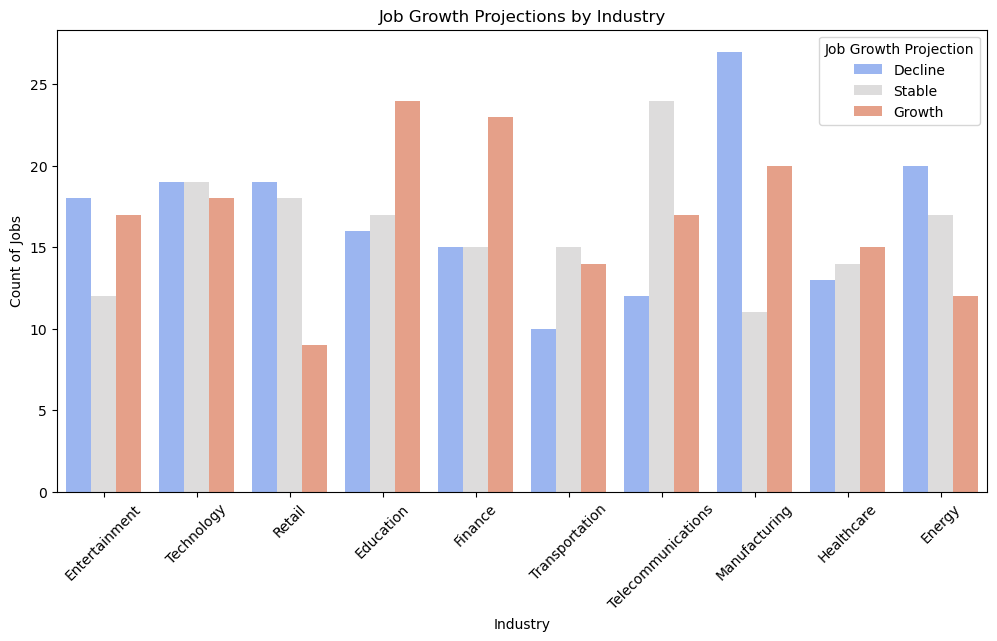

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(data=AI_Powered_Job_Market, x="Industry", hue="Job_Growth_Projection", palette="coolwarm")
plt.title("Job Growth Projections by Industry")
plt.xticks(rotation=45)
plt.xlabel("Industry")
plt.ylabel("Count of Jobs")
plt.legend(title="Job Growth Projection")
plt.show()

##### Relationship Between AI Adoption and Job Growth Projection

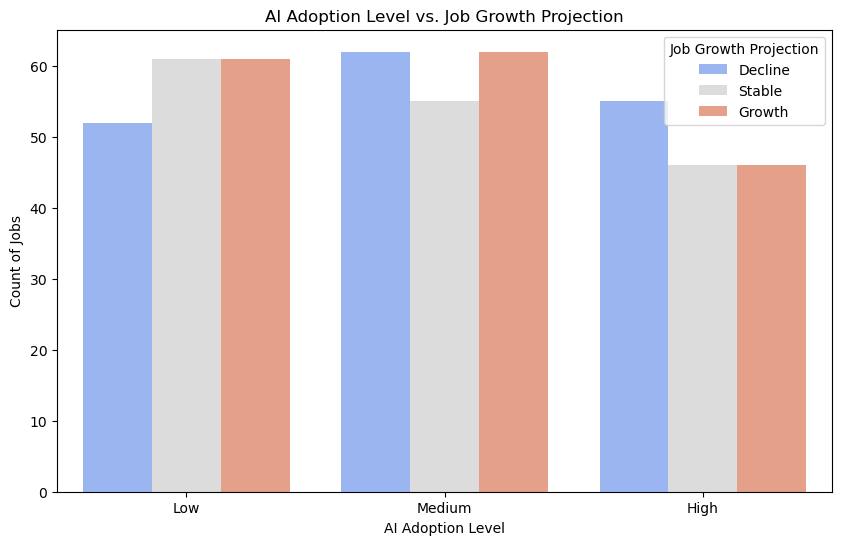

In [88]:
plt.figure(figsize=(10, 6))
sns.countplot(data=AI_Powered_Job_Market, x="AI_Adoption_Level", hue="Job_Growth_Projection", palette="coolwarm")
plt.title("AI Adoption Level vs. Job Growth Projection")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count of Jobs")
plt.legend(title="Job Growth Projection")
plt.show()


##### Distribution of Remote-Friendly Jobs

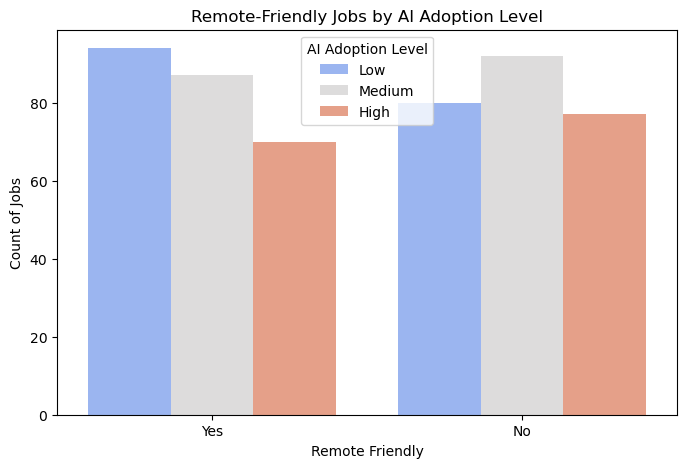

In [89]:
plt.figure(figsize=(8, 5))
sns.countplot(data=AI_Powered_Job_Market, x="Remote_Friendly", hue="AI_Adoption_Level", palette="coolwarm")
plt.title("Remote-Friendly Jobs by AI Adoption Level")
plt.xlabel("Remote Friendly")
plt.ylabel("Count of Jobs")
plt.legend(title="AI Adoption Level")
plt.show()

##### Most In-Demand Skills by AI Adoption Level

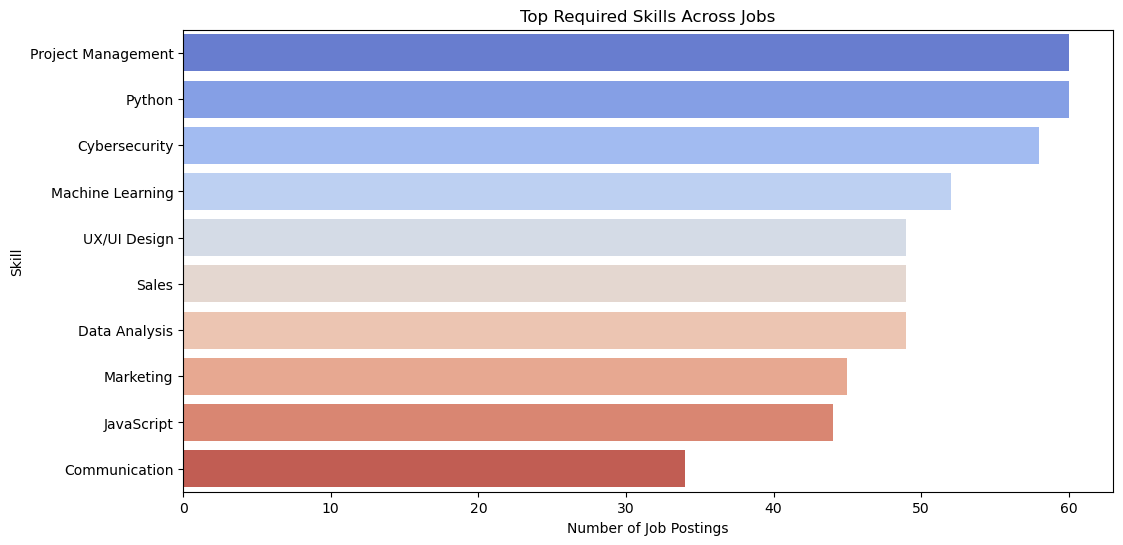

In [90]:
top_skills = AI_Powered_Job_Market["Required_Skills"].value_counts().nlargest(15)  # Get top 15 skills
plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="coolwarm")
plt.title("Top Required Skills Across Jobs")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.show()

##### Average Salary by Industry and AI Adoption Level

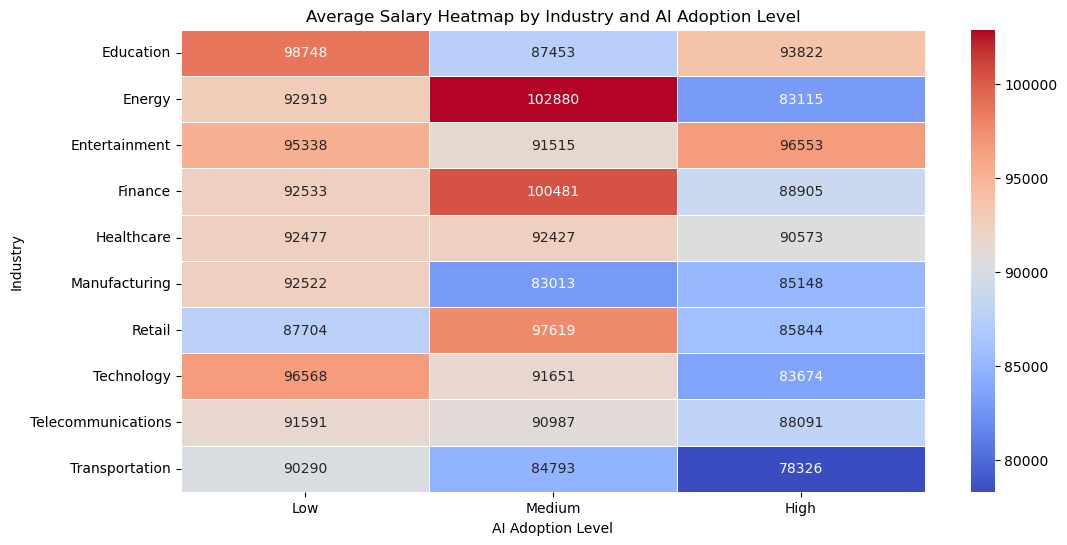

In [91]:
salary_pivot = AI_Powered_Job_Market.pivot_table(values="Salary_USD", index="Industry", columns="AI_Adoption_Level", aggfunc="mean")

plt.figure(figsize=(12, 6))
sns.heatmap(salary_pivot, annot=True, fmt=".0f", cmap="coolwarm", linewidths=0.5)
plt.title("Average Salary Heatmap by Industry and AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Industry")
plt.show()


### Dataset 2

In [92]:
print("\nSummary statistics:")
print(AI_Job_Threat_Index.describe())


Summary statistics:
             Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000           0.036585
25%     161.000000  1085.250000           0.137271
50%     270.000000  1577.500000           0.199281
75%     608.750000  2273.000000           0.260572
max    1387.000000  5666.000000                inf


##### Check for missing values

In [93]:
print("\nMissing values in each column:")
print(AI_Job_Threat_Index.isnull().sum())


Missing values in each column:
Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64


##### Change AI Impack to float instead of string

In [67]:
AI_Job_Threat_Index['AI Impact'] = AI_Job_Threat_Index['AI Impact'].str.rstrip('%').astype(float)/ 100

In [68]:
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


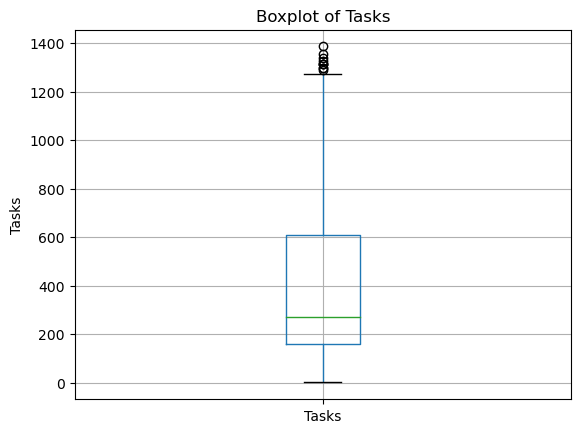

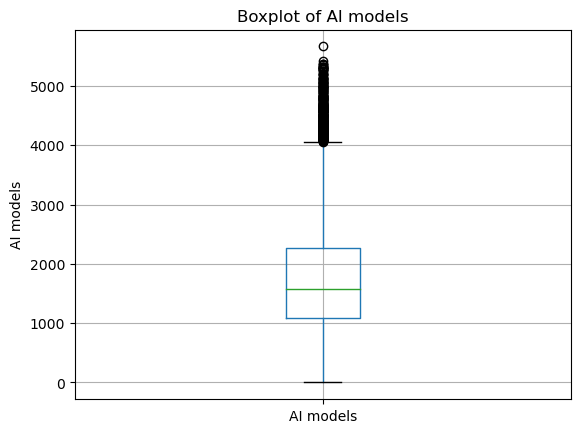

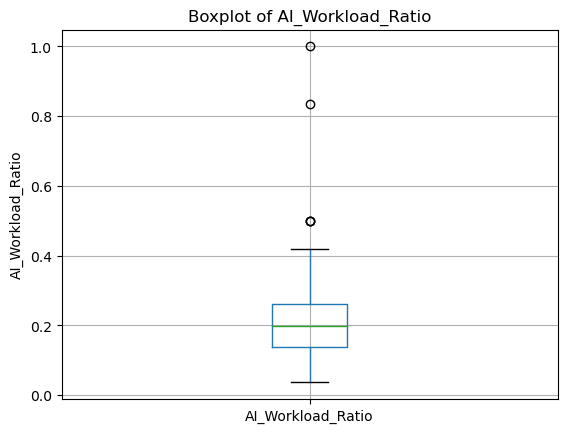

In [69]:
quant_features = ['Tasks', 'AI models', 'AI_Workload_Ratio']
for col in quant_features:
    plt.figure()
    AI_Job_Threat_Index.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [70]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


In [71]:
filtered_df = AI_Job_Threat_Index.copy()
for col in quant_features:
    filtered_df = remove_outliers(filtered_df, col)

filtered_df.columns = filtered_df.columns.str.replace(' ', '_')
filtered_df.head()

,Job_titiles,AI_Impact,Tasks,AI_models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


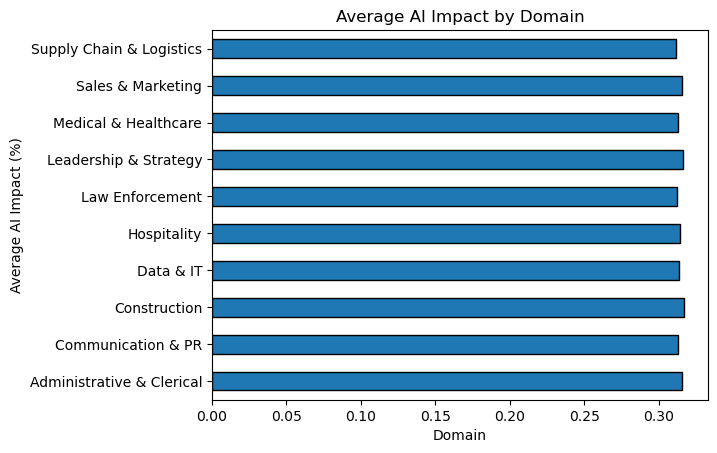

In [72]:
avg_impact_by_domain = filtered_df.groupby('Domain')['AI_Impact'].mean()

plt.figure()
avg_impact_by_domain.plot(kind='barh', edgecolor='black')
plt.title("Average AI Impact by Domain")
plt.xlabel("Domain")
plt.ylabel("Average AI Impact (%)")
plt.show()

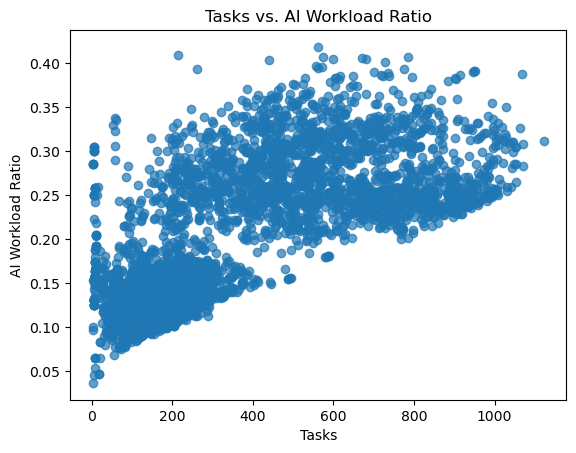

In [73]:
# Scatter plot: Tasks vs. AI Workload Ratio
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Tasks vs. AI Workload Ratio")
plt.xlabel("Tasks")
plt.ylabel("AI Workload Ratio")
plt.show()

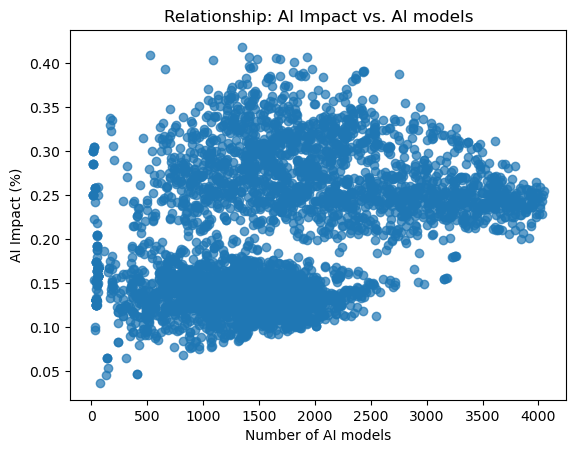

Correlation between AI Impact and AI models: 0.3666787077129089


In [74]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

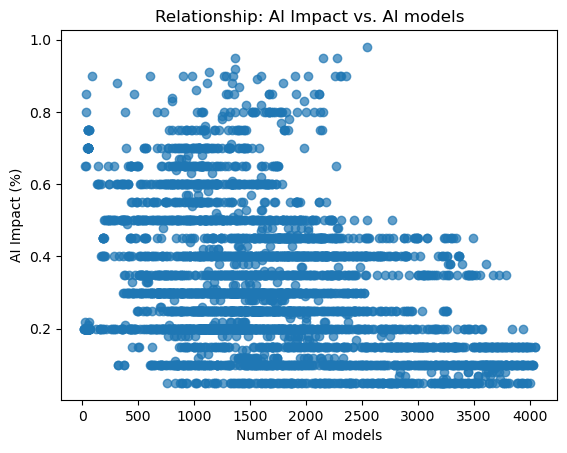

Correlation between AI Impact and AI models: -0.3508933375313581


In [76]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

In [78]:
filtered_df.columns

Index(['Job_titiles', 'AI_Impact', 'Tasks', 'AI_models', 'AI_Workload_Ratio',
       'Domain'],
      dtype='object')

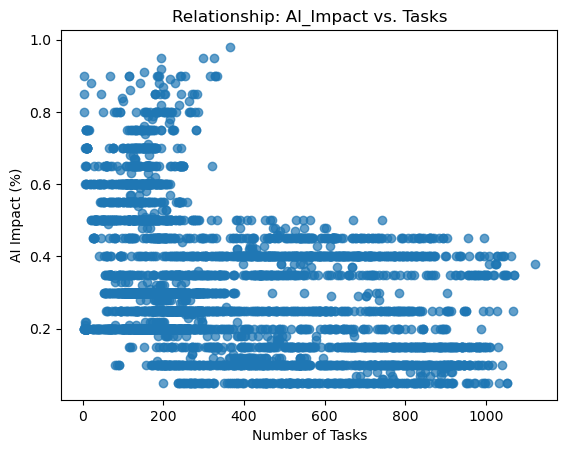

Correlation between AI Impact and Tasks: -0.358320537551422


In [96]:
from scipy.stats import pearsonr
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI_Impact vs. Tasks")
plt.xlabel("Number of Tasks")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(filtered_df['Tasks'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and Tasks:", corr_coef)

In [84]:
import itertools
col = filtered_df.columns.drop('AI_Impact')
formulas = []
for r in range(len(col) + 1):
    for combo in itertools.combinations(col, r):
        # For the empty subset, use a null model indicator (using 1 as a placeholder)
        if not combo:
            formula = "AI_Impact ~ 1"
        else:
            formula = "AI_Impact ~ " + " + ".join(combo)
        formulas.append(formula)
formulas[-10:]

['AI_Impact ~ Tasks + AI_models + AI_Workload_Ratio',
 'AI_Impact ~ Tasks + AI_models + Domain',
 'AI_Impact ~ Tasks + AI_Workload_Ratio + Domain',
 'AI_Impact ~ AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + AI_Workload_Ratio',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Tasks + AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + AI_Workload_Ratio + Domain']

In [ ]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic 
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for i in already_selected_columns:
        new_columns = already_selected_columns - {i}
        if new_columns:
            formula = f'{response} ~ {" + ".join(new_columns)}'
        else:
            formula = f'{response} ~ 1'
        # formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = i
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential, current = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current <= best:
            already_selected_columns = already_selected_columns - {potential}
            best = current
            print(f'Criterion: {best}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

backward_vars = backward(filtered_df, criterion, "AI_Impact")
backward_vars

## Hypothesis Testing (AI Powered Job Market)

#### Encode Categories

In [108]:
AI_Powered_Job_Market["AI_Adoption_Level"] = pd.Categorical(AI_Powered_Job_Market["AI_Adoption_Level"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Automation_Risk"] = pd.Categorical(AI_Powered_Job_Market["Automation_Risk"], categories=["Low", "Medium", "High"], ordered=True)
AI_Powered_Job_Market["Job_Growth_Projection"] = pd.Categorical(AI_Powered_Job_Market["Job_Growth_Projection"], categories=["Decline", "Stable", "Growth"], ordered=True)

#### T-Test (AI Job Salary vs. Non-AI Job Salary) --> Two-Tailed Test

We are testing whether there is a statistically significant difference in salaries between jobs with high AI adoption and jobs with low AI adoption.

Null: The mean salary of high AI adoption jobs is equal to the mean salary of low AI adoption jobs

ALternate: The mean salary of high AI adoption jobs is different from the mean salary of low AI adoption jobs.

In [109]:
ai_jobs = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Salary_USD"]
non_ai_jobs = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Salary_USD"]

t_stat, p_value = stats.ttest_ind(ai_jobs, non_ai_jobs, nan_policy='omit')

print("T-Test: Salary in AI vs. Non-AI Jobs")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

T-Test: Salary in AI vs. Non-AI Jobs
T-Statistic: -2.4602, P-Value: 0.0144


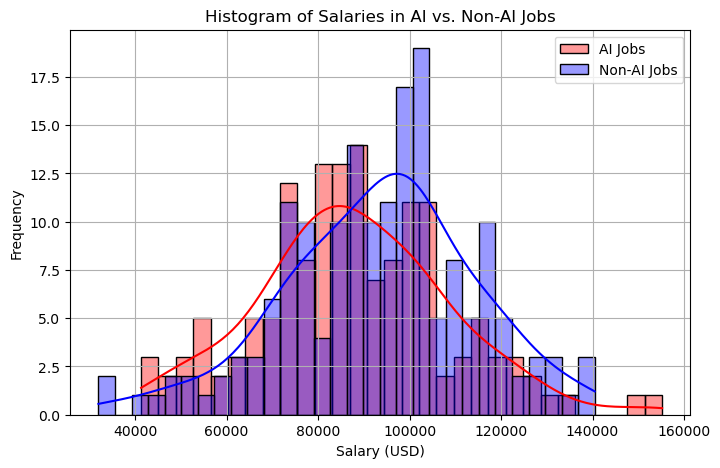

In [120]:
plt.figure(figsize=(8, 5))
sns.histplot(ai_jobs, bins=30, kde=True, label="AI Jobs", alpha=0.4, color='red')
sns.histplot(non_ai_jobs, bins=30, kde=True, label="Non-AI Jobs", alpha=0.4, color='blue')
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.title("Histogram of Salaries in AI vs. Non-AI Jobs")
plt.legend()
plt.grid(True)
plt.show()


#### Chi-Squared Test: AI Adoption vs. Job Growth Projection

We are testing whether there is a significant association between AI adoption levels and job growth projections.

Null: There is no association between AI adoption level and job growth projection (job growth projection is independent of AI adoption)

Alternate: There is a significant association between AI adoption level and job growth projection (AI adoption may influence job growth projections)

In [ ]:
contingency_table = pd.crosstab(AI_Powered_Job_Market["AI_Adoption_Level"], AI_Powered_Job_Market["Job_Growth_Projection"])

Chi-Square Test: AI Adoption vs. Job Growth Projection
Chi-Square Statistic: 2.3761, P-Value: 0.6670


In [107]:
contingency_table

Job_Growth_Projection,Decline,Stable,Growth
AI_Adoption_Level,,,
Low,52,61,61
Medium,62,55,62
High,55,46,46


In [110]:
chi2_stat, chi2_p_value, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Test: AI Adoption vs. Job Growth Projection")
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-Value: {chi2_p_value:.4f}")

Chi-Square Test: AI Adoption vs. Job Growth Projection
Chi-Square Statistic: 2.3761, P-Value: 0.6670


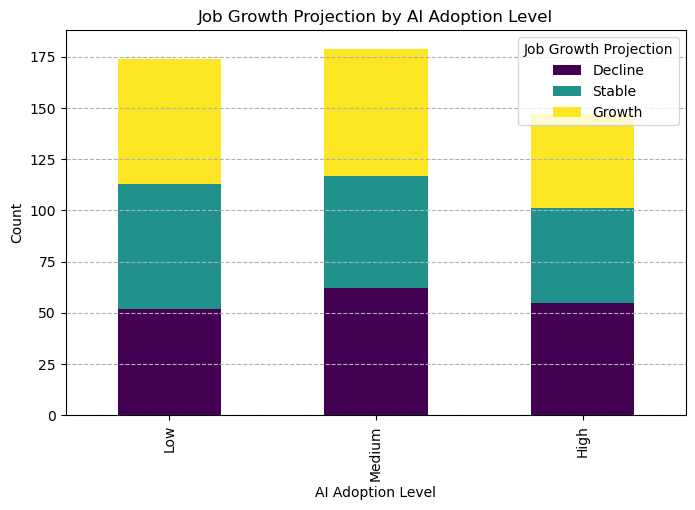

In [ ]:
contingency_table.plot(kind='bar', stacked=True, figsize=(8,5), colormap="viridis")
plt.title("Job Growth Projection by AI Adoption Level")
plt.xlabel("AI Adoption Level")
plt.ylabel("Count")
plt.legend(title="Job Growth Projection")
plt.grid(axis='y', linestyle="--")
plt.show()

#### Mann-Whitney U test

We are testing whether the distribution of job postings across industries differs significantly ebtween AI-heavy vs traditional / low AI-adoption industries.

Null: The distribution of job postings across industries is the same between AI-heavy and traditional industries (AI adoption does not significantly affect the distribution of job postings across industries)

Alternate: The distribution of job postings across industries differs between AI-heavy and traditional industries (some industries might have significantly more AI-heavy job postings compared to traditional jobs)

In [102]:
ai_industries = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Industry"].value_counts()
non_ai_industries = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Industry"].value_counts()

common_industries = ai_industries.index.intersection(non_ai_industries.index)
ai_industries = ai_industries[common_industries]
non_ai_industries = non_ai_industries[common_industries]

mwu_stat, mwu_p_value = stats.mannwhitneyu(ai_industries, non_ai_industries, alternative="two-sided")

print("Mann-Whitney U Test: Job Posting Distributions in AI-heavy vs. Traditional Industries")
print(f"Test/U-Statistic: {mwu_stat:.4f}, P-Value: {mwu_p_value:.4f}")


Mann-Whitney U Test: Job Posting Distributions in AI-heavy vs. Traditional Industries
Test/U-Statistic: 24.0000, P-Value: 0.0525


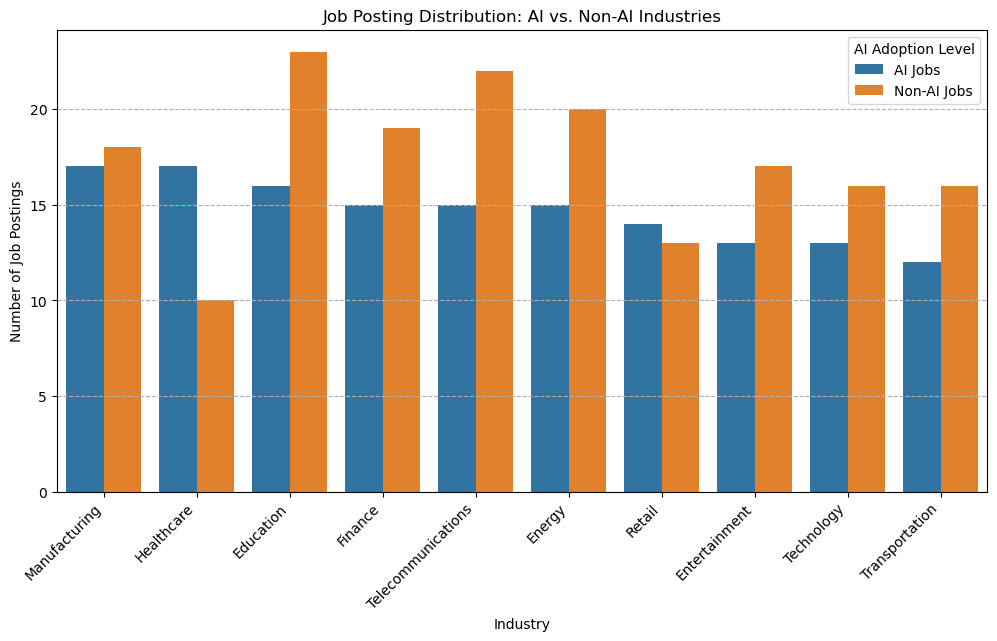

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

common_industries = ai_industries.index.intersection(non_ai_industries.index)
ai_industries = ai_industries[common_industries]
non_ai_industries = non_ai_industries[common_industries]

industry_data = pd.DataFrame({
    "Industry": common_industries,
    "AI Jobs": ai_industries.values,
    "Non-AI Jobs": non_ai_industries.values
}).melt(id_vars="Industry", var_name="AI_Adoption", value_name="Job Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=industry_data, x="Industry", y="Job Count", hue="AI_Adoption")
plt.xticks(rotation=45, ha="right")
plt.title("Job Posting Distribution: AI vs. Non-AI Industries")
plt.xlabel("Industry")
plt.ylabel("Number of Job Postings")
plt.legend(title="AI Adoption Level")
plt.grid(axis='y', linestyle="--")
plt.show()

#### Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution

We are testing to see whether the distribution of job growth projections differs significantly between AI-heavy and non-AI industries.

Null: The distribution of job growth projections is the same for AI-heavy and non-AI jobs (AI adoption does not significantly impact job growth trends)

Alternate: The job growth distribution differs between AI-heavy and non-AI jobs (AI adoption is influencing job growth to a point where it makes its distribution different from non-AI jobs)

In [105]:
job_growth_mapping = {"Decline": -1, "Stable": 0, "Growth": 1}
AI_Powered_Job_Market["Job_Growth_Numeric"] = AI_Powered_Job_Market["Job_Growth_Projection"].map(job_growth_mapping)

ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Job_Growth_Numeric"]
non_ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Job_Growth_Numeric"]

ks_stat, ks_p_value = stats.ks_2samp(ai_job_growth, non_ai_job_growth)

print("Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution")
print(f"K-S Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")

Kolmogorov-Smirnov (K-S) Test: AI vs. Non-AI Job Growth Distribution
K-S Statistic: 0.0753, P-Value: 0.7190


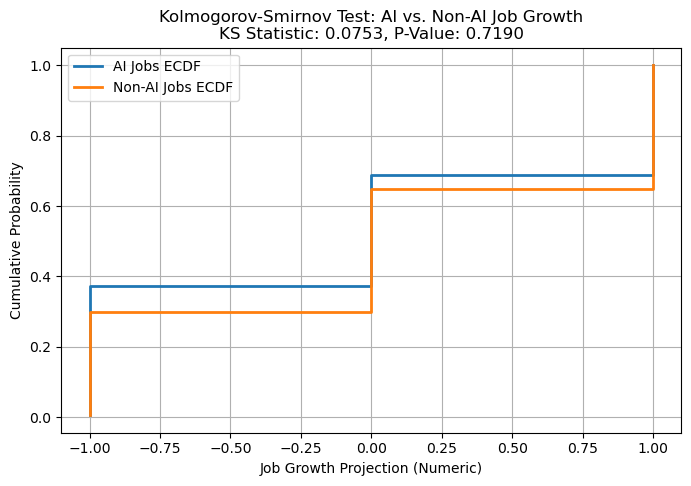

In [124]:
job_growth_mapping = {"Decline": -1, "Stable": 0, "Growth": 1}

AI_Powered_Job_Market["Job_Growth_Numeric"] = AI_Powered_Job_Market["Job_Growth_Projection"].map(job_growth_mapping)

ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "High"]["Job_Growth_Numeric"]
non_ai_job_growth = AI_Powered_Job_Market[AI_Powered_Job_Market["AI_Adoption_Level"] == "Low"]["Job_Growth_Numeric"]

ks_stat, ks_p_value = ks_2samp(ai_job_growth, non_ai_job_growth)

ai_sorted = np.sort(ai_job_growth)
non_ai_sorted = np.sort(non_ai_job_growth)
ai_ecdf = np.arange(1, len(ai_sorted) + 1) / len(ai_sorted)
non_ai_ecdf = np.arange(1, len(non_ai_sorted) + 1) / len(non_ai_sorted)

plt.figure(figsize=(8, 5))
plt.plot(ai_sorted, ai_ecdf, label="AI Jobs ECDF", drawstyle='steps-post', lw=2)
plt.plot(non_ai_sorted, non_ai_ecdf, label="Non-AI Jobs ECDF", drawstyle='steps-post', lw=2)
plt.xlabel("Job Growth Projection (Numeric)")
plt.ylabel("Cumulative Probability")
plt.title(f"Kolmogorov-Smirnov Test: AI vs. Non-AI Job Growth\nKS Statistic: {ks_stat:.4f}, P-Value: {ks_p_value:.4f}")
plt.legend()
plt.grid(True)
plt.show()